In [82]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from fancyimpute import SoftImpute
import plotly.express as px
from scipy.stats import ttest_rel



In [83]:
# Define the folder path
path = "C://Users//roryq//Downloads//MQE_Data//"  # Replace with your actual folder path

# Input and output file names
input_file = f"{path}pgh.csv"

df = pd.read_csv(input_file, low_memory=False)

In [84]:
# Define the folder path
path = "C://Users//roryq//Downloads//MQE_Data//"  # Replace with your actual folder path

# Input and output file names
input_file = f"{path}ADJPrice.csv"

df = pd.read_csv(input_file, low_memory=False)

In [85]:
# Assuming your DataFrame is called 'df'
df_cleaned = df.dropna(axis=0, how='any')  # Drop rows with any NaN values


In [86]:
df_cleaned.shape

(38, 9)

In [87]:
df_cleaned.head()

,PROPERTYZIP.x,emmean,SE,df,lower.CL,upper.CL,adjusted_price,lower_ci,upper_ci
0,15201,631.113197,28.008623,130031,576.216793,686.009600,398303.867114,332025.792722,470609.171759
1,15202,532.001390,27.976518,130031,477.167913,586.834868,283025.479375,227689.216834,344375.162484
2,15203,617.348131,28.022337,130031,562.424849,672.271413,381118.714797,316321.711031,451948.852314
3,15204,458.862263,28.026965,130031,403.929911,513.794616,210554.576815,163159.372791,263984.907586
4,15205,518.420683,27.980505,130031,463.579390,573.261975,268760.004470,214905.851284,328629.292365


In [160]:
# Find the highest and lowest 'emmean' values
max_emmean = df_cleaned['adjusted_price'].max()
min_emmean = df_cleaned['adjusted_price'].min()

# Calculate the difference between the highest and lowest 'emmean' values
emmean_difference = max_emmean - min_emmean

emmean_difference

298940.921270278

In [161]:
# Find the rows with the highest and lowest 'emmean'
max_emmean_row = df_cleaned.loc[df_cleaned['adjusted_price'] == max_emmean]
min_emmean_row = df_cleaned.loc[df_cleaned['adjusted_price'] == min_emmean]

# Get the lower_ci of the row with the lowest emmean and the upper_ci of the row with the highest emmean
lower_ci_lower_emmean = min_emmean_row['lower_ci'].values[0]  # lower_ci of the lower emmean
upper_ci_higher_emmean = max_emmean_row['upper_ci'].values[0]  # upper_ci of the higher emmean

# Calculate the difference
price_difference = upper_ci_higher_emmean - lower_ci_lower_emmean
price_difference

426965.342689096

In [163]:
# Get the upper_ci of the row with the lowest emmean and the lower_ci of the row with the highest emmean
upper_ci_lower_emmean = min_emmean_row['upper_ci'].values[0]  # upper_ci of the lower emmean
lower_ci_higher_emmean = max_emmean_row['lower_ci'].values[0]  # lower_ci of the higher emmean

# Calculate the difference
price_difference_alternate = lower_ci_higher_emmean - upper_ci_lower_emmean
price_difference_alternate


170959.968829107

In [88]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROPERTYZIP.x   38 non-null     int64  
 1   emmean          38 non-null     float64
 2   SE              38 non-null     float64
 3   df              38 non-null     int64  
 4   lower.CL        38 non-null     float64
 5   upper.CL        38 non-null     float64
 6   adjusted_price  38 non-null     float64
 7   lower_ci        38 non-null     float64
 8   upper_ci        38 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 2.8 KB


In [89]:
# Write the DataFrame to a CSV file
df_cleaned.to_csv("C://Users//roryq//Downloads//MQE_Data//pgh_Dropped.csv", index=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BOXCNT      126 non-null    float64 
 1   COUNTYFIPS  109 non-null    object  
 2   ZIP         126 non-null    int32   
 3   GlobalID    126 non-null    object  
 4   COLOR       126 non-null    float64 
 5   S3DZIP      104 non-null    object  
 6   STATEFIPS   109 non-null    object  
 7   TOTRESCNT   126 non-null    float64 
 8   LON         126 non-null    float64 
 9   RELVER      104 non-null    object  
 10  BIZCNT      126 non-null    float64 
 11  STATE       111 non-null    object  
 12  COUNTYNAME  109 non-null    object  
 13  Shape_Leng  126 non-null    float64 
 14  MFDU        126 non-null    float64 
 15  ZIPTYPE     126 non-null    object  
 16  LAT         126 non-null    float64 
 17  SFDU        126 non-null    float64 
 18  NAME        126 non-null    object  
 19  

<Axes: >

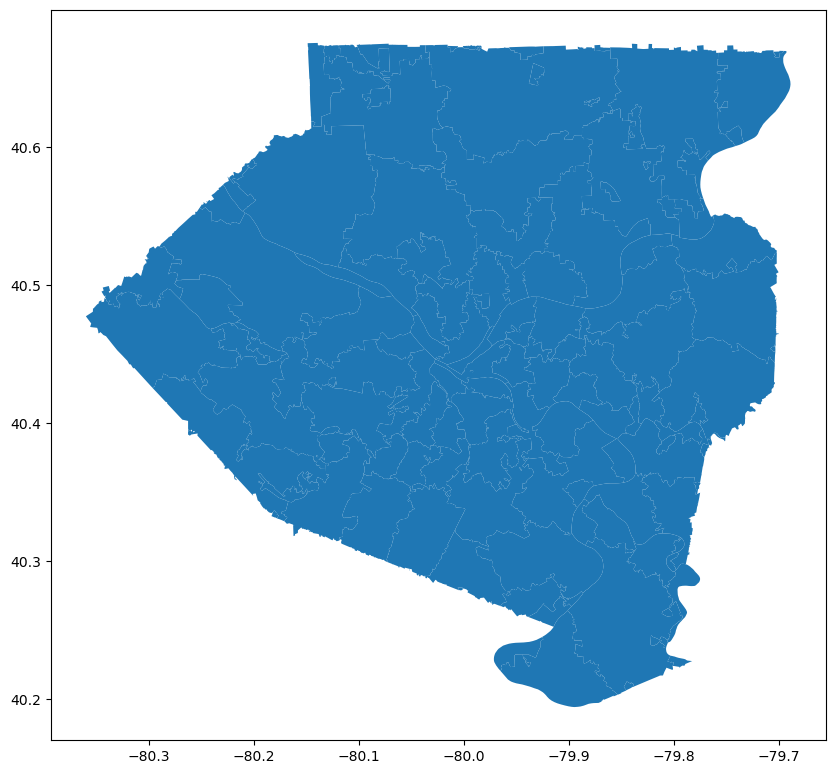

In [91]:
import geopandas as gpd

# Load the GeoJSON file into a GeoDataFrame
zips = gpd.read_file("C://Users//roryq//Downloads//MQE_Data//zips.geojson")


zips['ZIP'] = zips['ZIP'].astype(int)

# Display the first few rows of the GeoDataFrame to check the data
print(zips.info())



# Plot the GeoDataFrame (visualizing the ZIP code areas)
zips.plot(figsize=(10, 10))


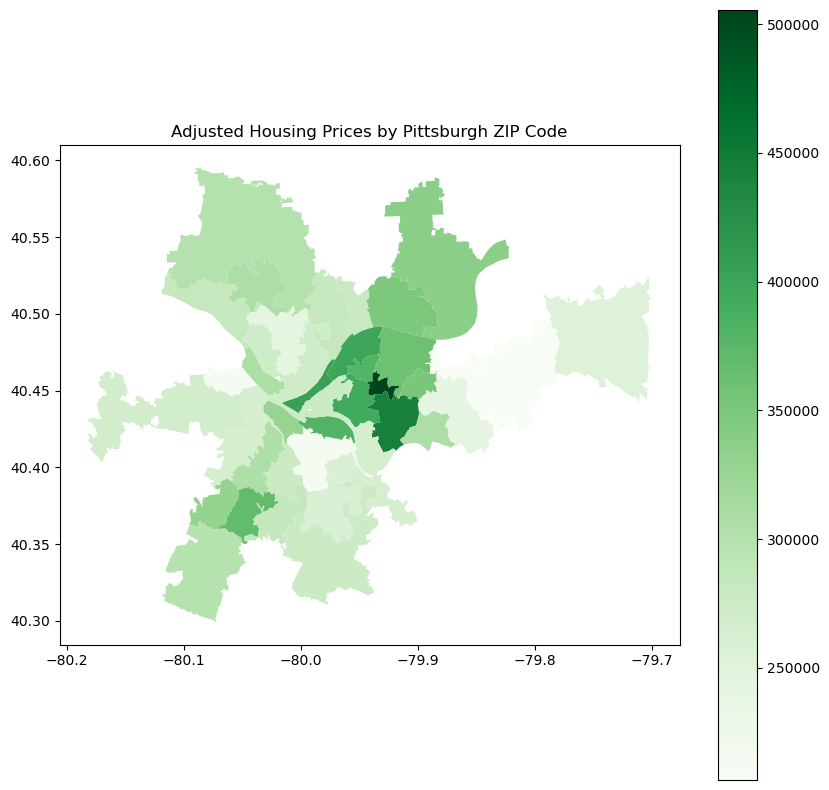

In [92]:

# Step 2: Calculate average price for each ZIP code
zipcode_avg_price = df.groupby('PROPERTYZIP.x')['adjusted_price'].mean().reset_index()

# Ensure the 'ZIP' column in the zipcodes_gdf and 'PROPERTYZIP.x' are both of type int
zips['ZIP'] = zips['ZIP'].astype(int)
zipcode_avg_price['PROPERTYZIP.x'] = zipcode_avg_price['PROPERTYZIP.x'].astype(int)


# Step 3: Merge the GeoDataFrame with the price data (based on ZIP code)
zips_with_prices = zips.merge(zipcode_avg_price, left_on='ZIP', right_on='PROPERTYZIP.x')

# Step 4: Plot the merged GeoDataFrame with prices as the color scale
zips_with_prices.plot(column='adjusted_price', figsize=(10, 10), legend=True, cmap='Greens')

# Customize the plot with labels and titles
plt.title("Adjusted Housing Prices by Pittsburgh ZIP Code")
plt.show()

In [93]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv("C://Users//roryq//Downloads//e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")  # Adjust the path

# Step 2: Check for any missing values in X and Y columns
df = df.dropna(subset=['X', 'Y'])  # Drop rows where X or Y are missing

# Step 3: Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['X'], df['Y']), crs="EPSG:4326")

# Step 4: Load ZIP code boundaries and ensure CRS match
zipcodes_gdf = gpd.read_file("C://Users//roryq//Downloads//MQE_Data//zips.geojson")  # Adjust the path
zipcodes_gdf = zipcodes_gdf.set_crs("EPSG:4326")

# Step 5: Perform a spatial join to assign ZIP codes to incident features
incidents_with_zip = gpd.sjoin(gdf, zipcodes_gdf, how="left", predicate="intersects")

# Debug: Check how many incidents have been assigned to ZIP codes
print(incidents_with_zip[['ZIP', 'geometry']].head())

# Step 6: Count the number of incidents (arrests) per ZIP code
zipcode_counts = incidents_with_zip.groupby('ZIP').agg(num_incidents=('ARRESTLOCATION', 'count')).reset_index()

# Debug: Check the first few rows of the incident count data
print(zipcode_counts.head())

# Step 7: Merge the ZIP code boundary GeoDataFrame with the incident count data
zips_with_incidents = zipcodes_gdf.merge(zipcode_counts, left_on='ZIP', right_on='ZIP', how='left')



     ZIP                    geometry
0  15213  POINT (-79.94928 40.45255)
1  15205  POINT (-80.08802 40.44014)
2  15238   POINT (-79.8918 40.48662)
3  15212  POINT (-80.00194 40.45408)
4  15205    POINT (-80.0522 40.4459)
     ZIP  num_incidents
0  15003             51
1  15035              1
2  15046              1
3  15065              1
4  15090              1


In [94]:
zips_with_incidents

,BOXCNT,COUNTYFIPS,ZIP,GlobalID,COLOR,S3DZIP,STATEFIPS,TOTRESCNT,LON,RELVER,...,STATE,COUNTYNAME,Shape_Leng,MFDU,ZIPTYPE,LAT,SFDU,NAME,geometry,num_incidents
0,66.0,42003,15007,{6D01623E-A4FD-4EDE-8E54-F3AD24D8D896},10.0,150,42,173.0,-79.932130,1.9.3,...,PA,ALLEGHENY,20129.308124,0.0,NON-UNIQUE,40.656688,107.0,BAKERSTOWN,"POLYGON ((-79.92421 40.65181, -79.92422 40.651...",NaN
1,38.0,42003,15014,{A5CFCAFB-0BA1-4989-878C-FAF392A77866},5.0,150,42,1493.0,-79.740832,1.9.3,...,PA,ALLEGHENY,17320.335211,59.0,NON-UNIQUE,40.607964,1396.0,BRACKENRIDGE,"POLYGON ((-79.73576 40.61129, -79.73574 40.611...",NaN
2,95.0,42003,15015,{E12E65DB-7422-44D2-9762-593336CBED13},10.0,150,42,525.0,-80.085235,1.9.3,...,PA,ALLEGHENY,33453.265660,0.0,NON-UNIQUE,40.636452,430.0,BRADFORD WOODS,"POLYGON ((-80.07258 40.64492, -80.07241 40.644...",NaN
3,129.0,42003,15018,{CAB240AC-217D-441D-8246-A054248D0097},11.0,150,42,415.0,-79.791237,1.9.3,...,PA,ALLEGHENY,76802.232756,0.0,NON-UNIQUE,40.289408,286.0,BUENA VISTA,"POLYGON ((-79.78014 40.29274, -79.7796 40.2922...",NaN
4,29.0,42003,15034,{7815B57B-8C77-487D-A3EB-0A895822320C},6.0,150,42,979.0,0.000000,1.9.3,...,PA,ALLEGHENY,26075.246862,0.0,NON-UNIQUE,0.000000,950.0,DRAVOSBURG,"POLYGON ((-79.88627 40.35929, -79.88607 40.359...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,127.0,42003,15126,{78263D85-EEF5-4E6E-8B84-280281DD4A5B},15.0,151,42,3084.0,-80.176206,1.9.3,...,PA,ALLEGHENY,181300.087152,294.0,NON-UNIQUE,40.407061,2663.0,IMPERIAL,"POLYGON ((-80.27935 40.49679, -80.2746 40.4930...",NaN
122,252.0,42007,15026,{0B1E8690-5DE3-4A94-8BBE-ED44CF7D2A40},0.0,150,42,1457.0,-80.373905,1.9.3,...,PA,BEAVER,115374.601753,0.0,NON-UNIQUE,40.512342,1205.0,CLINTON,"MULTIPOLYGON (((-80.28951 40.52807, -80.28813 ...",NaN
123,0.0,None,15071,{781016B8-921A-4927-A932-3BCA26131A33},0.0,None,None,0.0,0.000000,None,...,None,None,215959.500258,0.0,NON-UNIQUE,0.000000,0.0,OAKDALE,"MULTIPOLYGON (((-80.1056 40.39319, -80.10592 4...",NaN
124,0.0,42003,15207,{9F4CA788-9C92-4050-A5D0-DF54B9CB9291},0.0,None,42,0.0,0.000000,None,...,PA,ALLEGHENY,123893.748783,0.0,NON-UNIQUE,0.000000,0.0,PITTSBURGH,"MULTIPOLYGON (((-79.93842 40.42894, -79.93766 ...",1793.0


In [95]:
# Assuming 'ARRESTLOCATION' is the column that identifies the location of the arrest
zipcode_counts = incidents_with_zip.groupby('ZIP').agg(num_arrests=('ARRESTLOCATION', 'count')).reset_index()

# Debug: Check the first few rows of the arrest counts per ZIP code
zipcode_counts


,ZIP,num_arrests
0,15003,51
1,15035,1
2,15046,1
3,15065,1
4,15090,1
5,15104,2
6,15106,32
7,15108,1
8,15110,1
9,15112,13


In [96]:
import geopandas as gpd
import pandas as pd

# Ensure both 'ZIP' columns are of the same type (int)
zipcode_counts['ZIP'] = zipcode_counts['ZIP'].astype(int)  # Convert to int
zipcodes_gdf['ZIP'] = zipcodes_gdf['ZIP'].astype(int)  # Convert to int

# Step 1: Reproject the ZIP code geometries to a projected CRS (EPSG:3857)
zipcodes_gdf = zipcodes_gdf.to_crs(epsg=3857)

# Step 2: Calculate the area of each ZIP code (in square meters)
zipcodes_gdf['area'] = zipcodes_gdf.geometry.area  # Area in square meters

# Step 3: Rename the 'area' column in zipcodes_gdf to avoid conflicts
zipcodes_gdf.rename(columns={'area': 'zip_area'}, inplace=True)

# Step 4: Merge the area data with the zipcode_counts DataFrame
zipcode_counts = zipcode_counts.merge(zipcodes_gdf[['ZIP', 'zip_area']], on='ZIP', how='left')

# Step 5: Check the merged dataframe to ensure area is correctly bound to ZIP counts
print(zipcode_counts[['ZIP', 'num_arrests', 'zip_area']].head())


     ZIP  num_arrests      zip_area
0  15003           51  1.864560e+06
1  15035            1  1.917176e+06
2  15046            1  1.003220e+07
3  15065            1  5.686554e+07
4  15090            1  9.969645e+07


In [97]:

zipcode_counts['arrest_density'] = zipcode_counts['num_arrests'] / zipcode_counts['zip_area']

zipcode_counts


,ZIP,num_arrests,zip_area,arrest_density
0,15003,51,1.864560e+06,2.735230e-05
1,15035,1,1.917176e+06,5.216006e-07
2,15046,1,1.003220e+07,9.967904e-08
3,15065,1,5.686554e+07,1.758534e-08
4,15090,1,9.969645e+07,1.003045e-08
...,...,...,...,...
56,15238,278,7.970286e+07,3.487955e-06
57,15241,34,4.452470e+07,7.636210e-07
58,15275,1,6.112280e+06,1.636051e-07
59,15282,1,4.313518e+04,2.318293e-05


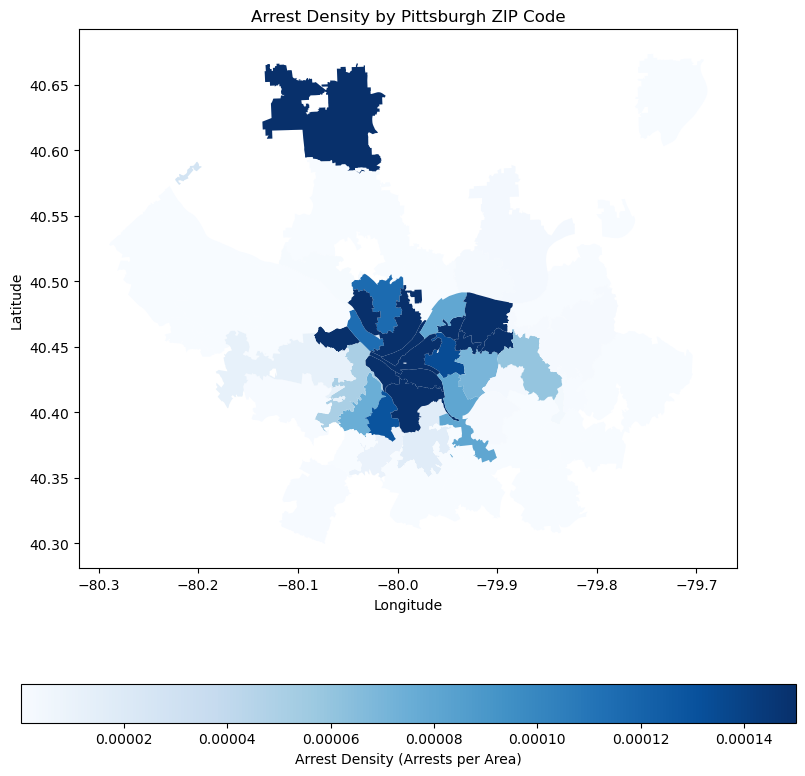

In [98]:

# Step 2: Convert the 'ZIP' column to the same type (int64) in both DataFrames
zipcode_counts['ZIP'] = zipcode_counts['ZIP'].astype(int)

# Step 3: Load the ZIP code boundaries (geojson file)
zipcodes_gdf = gpd.read_file("C://Users//roryq//Downloads//MQE_Data//zips.geojson")

# Step 4: Ensure that the 'ZIP' column in the geoDataFrame is also int64
zipcodes_gdf['ZIP'] = zipcodes_gdf['ZIP'].astype(int)

# Step 3: Merge the ZIP code boundaries with the arrest density data
# Merge on 'ZIP' field to attach 'arrest_density' to each ZIP code boundary
merged_gdf = zipcodes_gdf.merge(zipcode_counts[['ZIP', 'arrest_density']], on='ZIP', how='left')

# Step 4: Plot the merged GeoDataFrame with the arrest density as the color scale
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting the merged GeoDataFrame with the 'arrest_density' column as the color scale
merged_gdf.plot(column='arrest_density', ax=ax, legend=True,
                legend_kwds={'label': "Arrest Density (Arrests per Area)",
                             'orientation': "horizontal"},
                cmap='Blues',  # Color scale for arrest density (from Light Blue to Dark Blue)
                vmin=merged_gdf['arrest_density'].min(), vmax=.00015)  # Automatically adjust vmax

# Step 5: Customize the plot with titles and labels
plt.title("Arrest Density by Pittsburgh ZIP Code")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [99]:
# Step: Write the DataFrame to a CSV file
zipcode_counts.to_csv('C://Users//roryq//Downloads//zipcode_counts.csv', index=False)

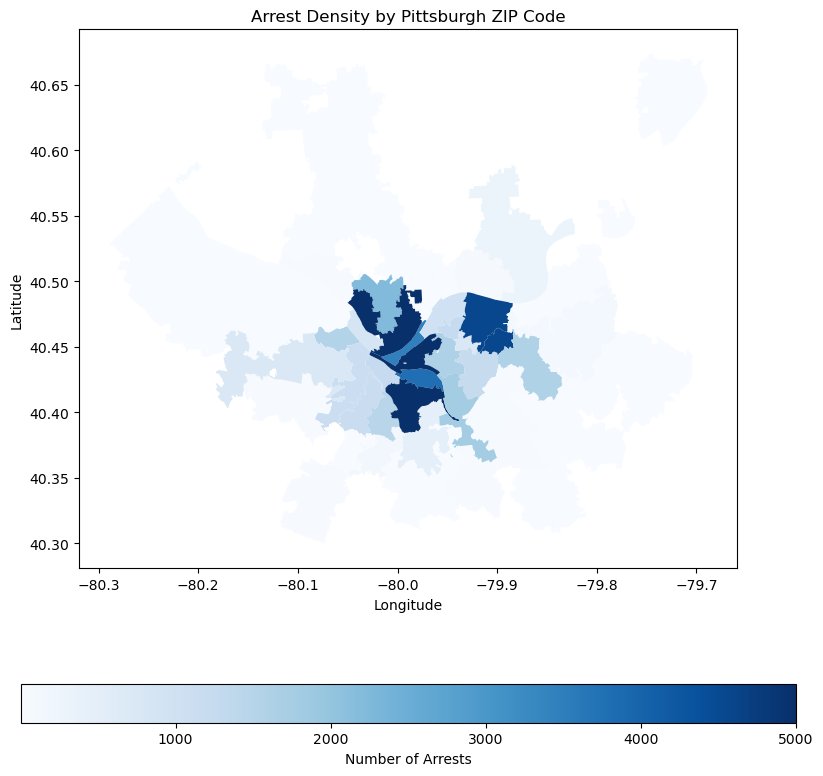

In [100]:
# Step 1: Load the uploaded CSV file with arrest density data
zipcode_counts_df = pd.read_csv("C://Users//roryq//Downloads//zipcode_counts.csv")

# Step 2: Convert the 'ZIP' column to the same type (int64) in both DataFrames
zipcode_counts_df['ZIP'] = zipcode_counts_df['ZIP'].astype(int)

# Step 3: Load the ZIP code boundaries (geojson file)
zipcodes_gdf = gpd.read_file("C://Users//roryq//Downloads//MQE_Data//zips.geojson")

# Step 4: Ensure that the 'ZIP' column in the geoDataFrame is also int64
zipcodes_gdf['ZIP'] = zipcodes_gdf['ZIP'].astype(int)

# Step 3: Merge the ZIP code boundaries with the arrest density data
# Merge on 'ZIP' field to attach 'arrest_density' to each ZIP code boundary
merged_gdf = zipcodes_gdf.merge(zipcode_counts_df[['ZIP', 'num_arrests']], on='ZIP', how='left')

# Step 4: Plot the merged GeoDataFrame with the arrest density as the color scale
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting the merged GeoDataFrame with the 'arrest_density' column as the color scale
merged_gdf.plot(column='num_arrests', ax=ax, legend=True,
                legend_kwds={'label': "Number of Arrests",
                             'orientation': "horizontal"},
                cmap='Blues',  # Color scale for arrest density (from Light Blue to Dark Blue)
                vmin=merged_gdf['num_arrests'].min(), vmax=5000)  # Automatically adjust vmax

# Step 5: Customize the plot with titles and labels
plt.title("Arrest Density by Pittsburgh ZIP Code")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [101]:
pop_df = {
    'Zipcode': ['15210', '15204', '15207', '15235', '15219','15212', '15223', '15221', '15226', '15227','15212', '15205', '15209', '15202', '15220','15234', '15218', '15239', '15229', '15216','15236', '15211', '15203', '15224', '15233', '15201', '15237', '15206', '15213', '15243','15215', '15208', '15222', '15228', '15241','15217', '15238', '15232'],
    'Population': [25017, 7809, 10751, 33811, 11010, 14751, 6656,29513,13943,29057,27600,24123,11769,19642,18519,14330,13443,21414,15251,21503,31152,10733,10713,10516,2918,13275,44161,29176,29839,13682,12234,9500,5649,18187,21941,26200,13000,11370]
}

# Check the length of both lists
zipcodes_length = len(pop_df['Zipcode'])
population_length = len(pop_df['Population'])

print(f"Length of Zipcodes: {zipcodes_length}")
print(f"Length of Population: {population_length}")


Length of Zipcodes: 38
Length of Population: 38


In [102]:
# Convert to DataFrame
pop_df = pd.DataFrame(pop_df)

pop_df['Zipcode'] = pop_df['Zipcode'].astype(int)


In [103]:
# Step 3: Merge the population data with the zipcode_counts DataFrame
zipcode_counts = zipcode_counts.merge(pop_df[['Zipcode', 'Population']], left_on='ZIP', right_on='Zipcode', how='left')
# Step 4: Drop rows with NaN values in the 'Population' column
zipcode_counts = zipcode_counts.dropna()

zipcode_counts

,ZIP,num_arrests,zip_area,arrest_density,Zipcode,Population
21,15201,1017,1.278694e+07,7.953428e-05,15201.0,13275.0
22,15202,32,2.362434e+07,1.354535e-06,15202.0,19642.0
23,15203,3776,7.734288e+06,4.882156e-04,15203.0,10713.0
24,15204,1549,8.865626e+06,1.747198e-04,15204.0,7809.0
25,15205,725,6.182427e+07,1.172679e-05,15205.0,24123.0
26,15206,4555,2.232013e+07,2.040759e-04,15206.0,29176.0
27,15207,1793,2.222406e+07,8.067833e-05,15207.0,10751.0
28,15208,4567,6.661036e+06,6.856290e-04,15208.0,9500.0
29,15209,2,2.176462e+07,9.189223e-08,15209.0,11769.0
30,15210,5611,2.094923e+07,2.678380e-04,15210.0,25017.0


In [104]:
zipcode_counts['arrest_density_pop'] = zipcode_counts['num_arrests'] / zipcode_counts['Population']

zipcode_counts

,ZIP,num_arrests,zip_area,arrest_density,Zipcode,Population,arrest_density_pop
21,15201,1017,1.278694e+07,7.953428e-05,15201.0,13275.0,0.076610
22,15202,32,2.362434e+07,1.354535e-06,15202.0,19642.0,0.001629
23,15203,3776,7.734288e+06,4.882156e-04,15203.0,10713.0,0.352469
24,15204,1549,8.865626e+06,1.747198e-04,15204.0,7809.0,0.198361
25,15205,725,6.182427e+07,1.172679e-05,15205.0,24123.0,0.030054
26,15206,4555,2.232013e+07,2.040759e-04,15206.0,29176.0,0.156121
27,15207,1793,2.222406e+07,8.067833e-05,15207.0,10751.0,0.166775
28,15208,4567,6.661036e+06,6.856290e-04,15208.0,9500.0,0.480737
29,15209,2,2.176462e+07,9.189223e-08,15209.0,11769.0,0.000170
30,15210,5611,2.094923e+07,2.678380e-04,15210.0,25017.0,0.224287


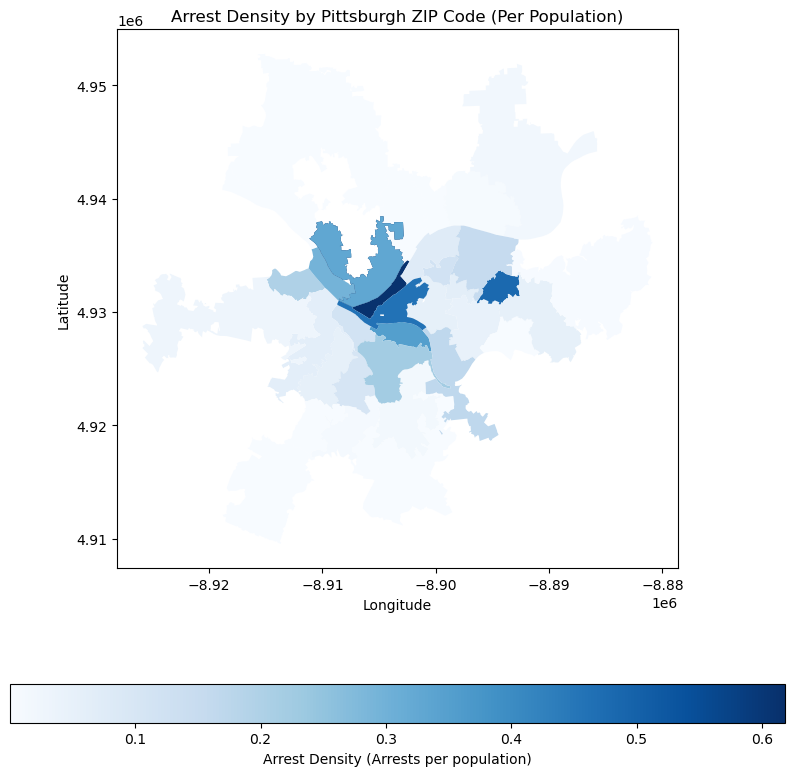

In [151]:
# Step 4: Plot the merged GeoDataFrame with the arrest density as the color scale
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Step 3: Merge the ZIP code boundaries with the arrest density data
# Merge on 'ZIP' field to attach 'arrest_density' to each ZIP code boundary
merged_gdf = zipcodes_gdf.merge(zipcode_counts[['ZIP', 'arrest_density_pop']], on='ZIP', how='left')

# Plotting the merged GeoDataFrame with the 'arrest_density' column as the color scale
merged_gdf.plot(column='arrest_density_pop', ax=ax, legend=True,
                legend_kwds={'label': "Arrest Density (Arrests per population)",
                             'orientation': "horizontal"},
                cmap='Blues')  # Automatically adjust vmax

# Step 5: Customize the plot with titles and labels
plt.title("Arrest Density by Pittsburgh ZIP Code (Per Population)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [108]:
import requests

# URL of the GeoJSON file
url = "https://data.wprdc.org/dataset/e41c0a67-837f-460c-94a9-6650b74f10da/resource/fd4d0f47-5a05-4716-861e-b0b328effe8b/download/alcogisallegheny-county-school-district-boundaries.geojson"

# Path where the file will be saved
output_path = "C://Users//roryq//Downloads//MQE_Data//alcogisallegheny-county-school-district-boundaries.geojson"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a file
    with open(output_path, 'wb') as file:
        file.write(response.content)
    print(f"File successfully downloaded and saved to {output_path}")
else:
    print("Failed to download the file. Status code:", response.status_code)


File successfully downloaded and saved to C://Users//roryq//Downloads//MQE_Data//alcogisallegheny-county-school-district-boundaries.geojson


In [112]:
school_districts_gdf = gpd.read_file("C://Users//roryq//Downloads//MQE_Data//alcogisallegheny-county-school-district-boundaries.geojson")  # Replace with the actual path to your school districts GeoJSON
zipcodes_gdf

school_districts_gdf

,OBJECTID,SCHOOLD,geometry
0,1,Allegheny Valley,"POLYGON ((-79.81144 40.56654, -79.8113 40.5619..."
1,2,Avonworth,"POLYGON ((-80.10916 40.57232, -80.10429 40.569..."
2,3,Baldwin-Whitehall,"MULTIPOLYGON (((-80.01709 40.38632, -80.0164 4..."
3,4,Bethel Park,"POLYGON ((-80.03796 40.28903, -80.04146 40.290..."
4,5,Brentwood Borough,"POLYGON ((-79.96448 40.36971, -79.96455 40.369..."
5,6,Carlynton,"POLYGON ((-80.07407 40.44034, -80.07407 40.440..."
6,7,Chartiers Valley,"POLYGON ((-80.14849 40.43261, -80.14846 40.432..."
7,8,City of Pittsburgh,"POLYGON ((-80.01082 40.50104, -80.01069 40.499..."
8,9,Clairton City,"POLYGON ((-79.88418 40.31146, -79.88332 40.311..."
9,10,Cornell,"POLYGON ((-80.15704 40.52257, -80.15409 40.522..."


C:\Users\roryq\AppData\Local\Temp\ipykernel_2164\3080894162.py:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


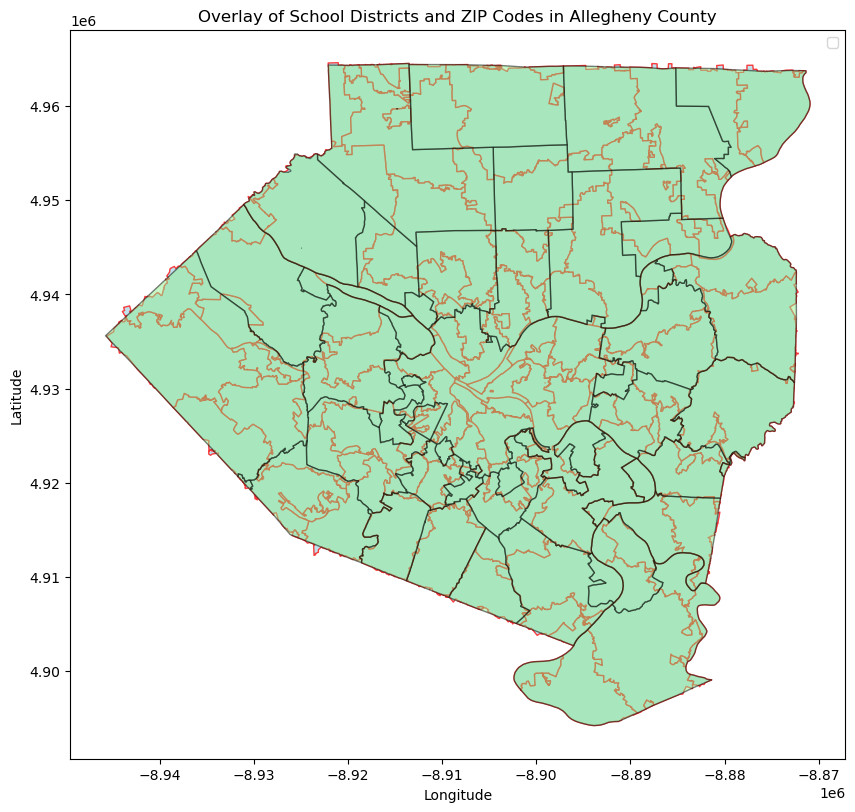

In [131]:
# Ensure both GeoDataFrames are using the same coordinate reference system (CRS)
zipcodes_gdf = zipcodes_gdf.to_crs(epsg=3857)  # Projected CRS (Web Mercator)
school_districts_gdf = school_districts_gdf.to_crs(epsg=3857)

# Plot the maps
fig, ax = plt.subplots(figsize=(10, 10))

# Plot ZIP code boundaries
zipcodes_gdf.plot(ax=ax, color='lightblue', edgecolor='red', alpha=0.75, label="ZIP Codes")

# Plot School district boundaries
school_districts_gdf.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.5, label="School Districts")

# Customize the plot
plt.title("Overlay of School Districts and ZIP Codes in Allegheny County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Show the plot
plt.show()

In [120]:
# Perform a spatial join between ZIP codes and school districts based on geographic overlap
# This will associate each ZIP code with its corresponding school district
# Perform a spatial join using "within" or "intersects"

# Ensure both GeoDataFrames are using the same coordinate reference system (CRS)
zipcodes_gdf = zipcodes_gdf.to_crs(epsg=3857)  # Projected CRS (Web Mercator)
school_districts_gdf = school_districts_gdf.to_crs(epsg=3857)

zip_school_join = gpd.sjoin(zipcodes_gdf, school_districts_gdf, how="left", predicate="intersects")  # or use "intersects"

# View the first few rows of the joined GeoDataFrame
print(zip_school_join[['ZIP', 'SCHOOLD']])  # Replace 'school_district_name' with the actual column name for school district


       ZIP             SCHOOLD
0    15007          Deer Lakes
0    15007       Pine-Richland
1    15014           Highlands
2    15015     North Allegheny
2    15015       Pine-Richland
..     ...                 ...
124  15207   West Mifflin Area
124  15207   Baldwin-Whitehall
124  15207        Steel Valley
124  15207  City of Pittsburgh
125  15090       Pine-Richland

[370 rows x 2 columns]


In [121]:
# Create a list of school district and rank data without excess "Pittsburgh" in the names
data = [
    ("Mt Lebanon", 6),
    ("Fox Chapel Area", 7),
    ("Pine-Richland", 8),
    ("Upper St. Clair", 11),
    ("Hampton Township", 12),
    ("North Allegheny", 27),
    ("Quaker Valley", 47),
    ("West Jefferson Hills", 53),
    ("Avonworth", 63),
    ("South Park", 91),
    ("West Allegheny", 104),
    ("Moon Area", 117),
    ("Bethel Park", 137),
    ("Montour", 144),
    ("Keystone Oaks", 155),
    ("Carlynton", 163),
    ("Shaler Area", 181),
    ("Elizabeth Forward", 201),
    ("Gateway", 241),
    ("Baldwin-Whitehall", 253),
    ("Deer Lakes", 279),
    ("Allegheny Valley", 285),
    ("North Hills", 297),
    ("Plum Borough", 360),
    ("Chartiers Valley", 394),
    ("Westinghouse Arts Academy Charter", 428),
    ("Riverview", 429),
    ("Highlands", 436),
    ("Brentwood Borough", 451),
    ("South Allegheny", 503),
    ("Northgate", 531),
    ("Clairton City", 540),
    ("City Charter High", 545),
    ("Steel Valley", 562),
    ("Cornell", 565),
    ("West Mifflin Area", 576),
    ("McKeesport Area", 579),
    ("Woodland Hills", 589),
    ("East Allegheny", 592),
    ("Urban Pathways 6-12 Charter", 612),
    ("Penn Hills", 627),
    ("Sto-Rox", 677),
    ("Passport Academy Charter", 684),
    ("A W Beattie Career Center", None),
    ("Forbes Road Career and Technology Center", None),
    ("McKeesport Area Technology Center", None),
    ("Parkway West Career and Technology Center", None),
    ("Spectrum Charter", None),
    ("Steel Center for Career and Technical Education", None),
    ("The New Academy Charter", None)
]

In [122]:
# Create a DataFrame
df = pd.DataFrame(data, columns=["School District", "Rank"])


In [123]:
!pip install fuzzywuzzy python-Levenshtein


  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for python-Levenshtein from https://files.pythonhosted.org/packages/2a/95/8c8fd923b0a702388da4f9e0368f490d123cc5224279e6a083984304a15e/python_levenshtein-0.27.1-py3-none-any.whl.metadata
  Obtaining dependency information for Levenshtein==0.27.1 from https://files.pythonhosted.org/packages/aa/ae/444d6e8ba9a35379a56926716f18bb2e77c6cf69e5324521fbe6885f14f6/levenshtein-0.27.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for rapidfuzz<4.0.0,>=3.9.0 from https://files.pythonhosted.org/packages/38/4c/faacecf70a4e202a02f029ec6f6e04e910d95c4ef36d7d63b83b160f7f3e/rapidfuzz-3.12.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/100.4 kB ? eta -:--:--
   ------------ --------------------------- 3

In [126]:
# Function to perform fuzzy matching
def fuzzy_match(row, choices, threshold=80):
    match = process.extractOne(row, choices, scorer=fuzz.partial_ratio)
    if match and match[1] >= threshold:
        return match[0]
    return None

# Extract the school district names from the df DataFrame for matching
df_school_districts = df['School District'].tolist()

# Perform fuzzy matching on the 'SCHOOLD' column of zip_school_join
zip_school_join['Matched School District'] = zip_school_join['SCHOOLD'].apply(
    fuzzy_match, args=(df_school_districts, 80)
)

# Merge the DataFrames based on the fuzzy match
merged_df = pd.merge(zip_school_join, df, left_on='Matched School District', right_on='School District', how='left')


merged_df.head()


,BOXCNT,COUNTYFIPS,ZIP,GlobalID,COLOR,S3DZIP,STATEFIPS,TOTRESCNT,LON,RELVER,...,LAT,SFDU,NAME,geometry,index_right,OBJECTID,SCHOOLD,Matched School District,School District,Rank
0,66.0,42003,15007,{6D01623E-A4FD-4EDE-8E54-F3AD24D8D896},10.0,150,42,173.0,-79.932130,1.9.3,...,40.656688,107.0,BAKERSTOWN,"POLYGON ((-8897122.906 4961118.174, -8897122.9...",10,11,Deer Lakes,Deer Lakes,Deer Lakes,279.0
1,66.0,42003,15007,{6D01623E-A4FD-4EDE-8E54-F3AD24D8D896},10.0,150,42,173.0,-79.932130,1.9.3,...,40.656688,107.0,BAKERSTOWN,"POLYGON ((-8897122.906 4961118.174, -8897122.9...",29,30,Pine-Richland,Pine-Richland,Pine-Richland,8.0
2,38.0,42003,15014,{A5CFCAFB-0BA1-4989-878C-FAF392A77866},5.0,150,42,1493.0,-79.740832,1.9.3,...,40.607964,1396.0,BRACKENRIDGE,"POLYGON ((-8876144.22 4955174.368, -8876142.41...",18,19,Highlands,Highlands,Highlands,436.0
3,95.0,42003,15015,{E12E65DB-7422-44D2-9762-593336CBED13},10.0,150,42,525.0,-80.085235,1.9.3,...,40.636452,430.0,BRADFORD WOODS,"POLYGON ((-8913639.261 4960107.925, -8913619.4...",24,25,North Allegheny,North Allegheny,North Allegheny,27.0
4,95.0,42003,15015,{E12E65DB-7422-44D2-9762-593336CBED13},10.0,150,42,525.0,-80.085235,1.9.3,...,40.636452,430.0,BRADFORD WOODS,"POLYGON ((-8913639.261 4960107.925, -8913619.4...",29,30,Pine-Richland,Pine-Richland,Pine-Richland,8.0


In [146]:
# Group by 'ZIP' and calculate the average rank for each ZIP code
zip_avg_rank = merged_df.groupby('ZIP')['Rank'].mean().reset_index()

# Display the result
print(zip_avg_rank.head())
zip_avg_rank.info()


     ZIP   Rank
0  15003   47.0
1  15005   27.0
2  15006  279.0
3  15007  143.5
4  15012  201.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZIP     125 non-null    int32  
 1   Rank    112 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 1.6 KB


In [147]:
# List of ZIP codes to keep, now as integers
zip_codes_to_keep = [15210, 15204, 15207, 15235, 15219, 15212, 15223, 15221, 15226, 15227, 
                     15212, 15205, 15209, 15202, 15220, 15234, 15218, 15239, 15229, 15216, 
                     15236, 15211, 15203, 15224, 15233, 15201, 15237, 15206, 15213, 15243, 
                     15215, 15208, 15222, 15228, 15241, 15217, 15238, 15232]

# Filter the DataFrame to keep only the rows where the 'ZIP' column is in the list of ZIP codes to keep
zip_avg_rank = zip_avg_rank[zip_avg_rank['ZIP'].isin(zip_codes_to_keep)]

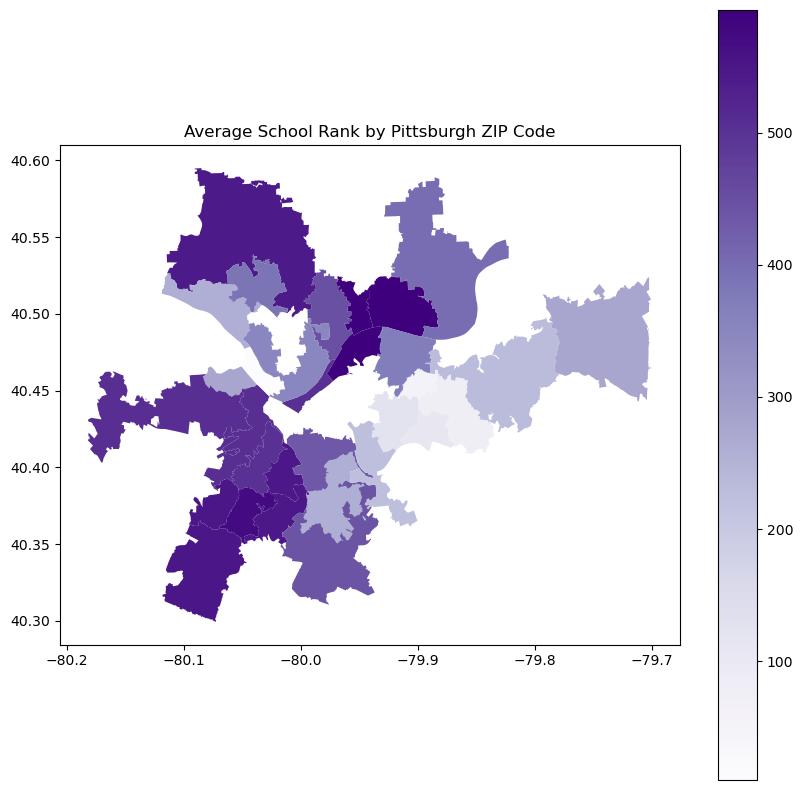

In [150]:

# Invert the rank scale: Max rank is 686, so we subtract the current rank from 687
max_rank = 686
zip_avg_rank['Inverted Rank'] = max_rank - zip_avg_rank['Rank'] + 1


# Step 3: Merge the GeoDataFrame with the price data (based on ZIP code)
zips_with_rank = zips.merge(zip_avg_rank, left_on='ZIP', right_on='ZIP')



# Step 4: Plot the merged GeoDataFrame with prices as the color scale
zips_with_rank.plot(column='Inverted Rank', figsize=(10, 10), legend=True, cmap='Purples')

# Customize the plot with labels and titles
plt.title("Average School Rank by Pittsburgh ZIP Code")
plt.show()